# Predicting heart disease using ml

Approach

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

In [62]:
# Note to myself
experimenting = ["Hyperparameter tuning",
                 "Feature importance",
                 "Confusion matrix",
                 "Cross-validation",
                 "Precision",
                 "Recall",
                 "F1 score",
                 "classification report",
                 "ROC curve",
                 "AUC (Area under the curve)"]

In [72]:
# Regular exploratory data analysis (EDA) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, \
    RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, \
    precision_score, recall_score, f1_score, \
    RocCurveDisplay

# Load data

In [73]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration

<Axes: xlabel='target'>

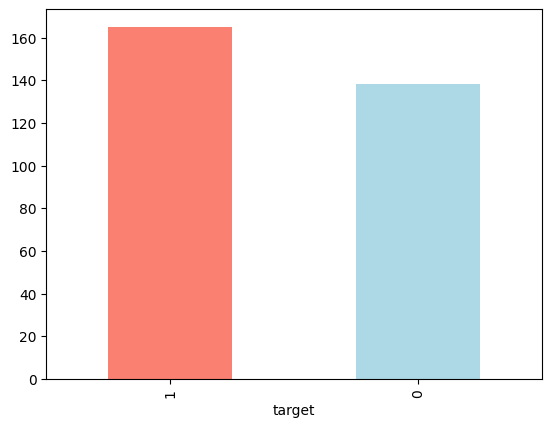

In [74]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [76]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [77]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [78]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [79]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

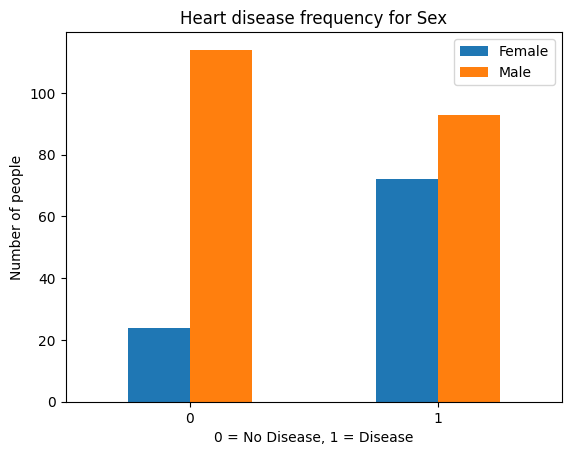

In [80]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",)
plt.title("Heart disease frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of people")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [81]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

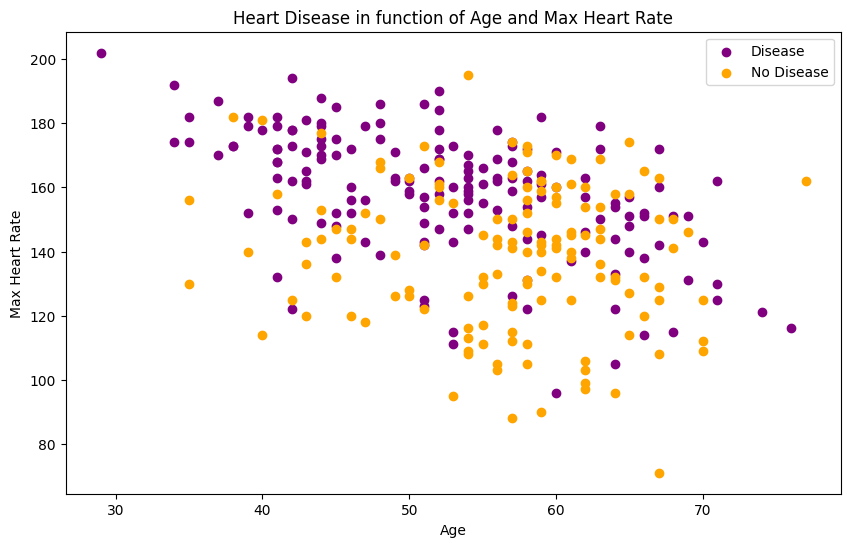

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(df["age"][df.target == 1], df["thalach"][df.target == 1], c="purple") 
plt.scatter(df["age"][df.target == 0], df["thalach"][df.target == 0], c="orange")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

### Age distribution with a histogram

<Axes: ylabel='Frequency'>

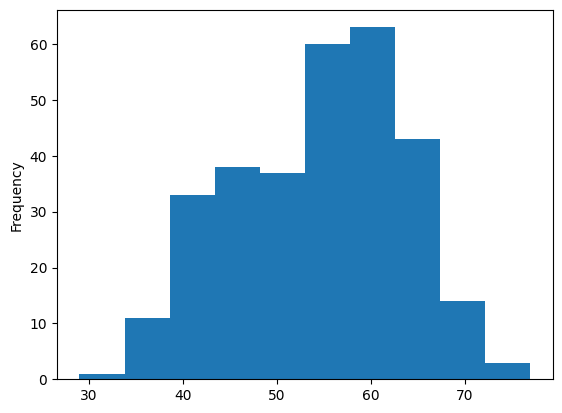

In [83]:
df["age"].plot.hist()

### Heart Disease Frequency per Chest Pain Type

In [84]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0, 0.5, 'Number of people')

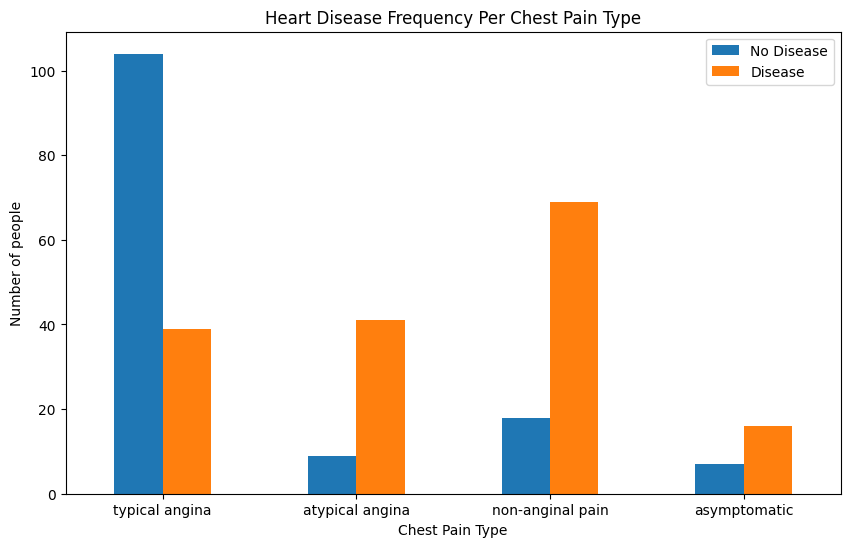

In [85]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar", figsize=(10, 6))
plt.legend(["No Disease", "Disease"])
plt.xlabel("Chest Pain Type")
# change the xaxis ticks from 0 1 2 3 to ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
plt.xticks(ticks=[0, 1, 2, 3], labels=["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"], rotation=0)
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.ylabel("Number of people")

In [86]:
# Make a correlation matrix
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


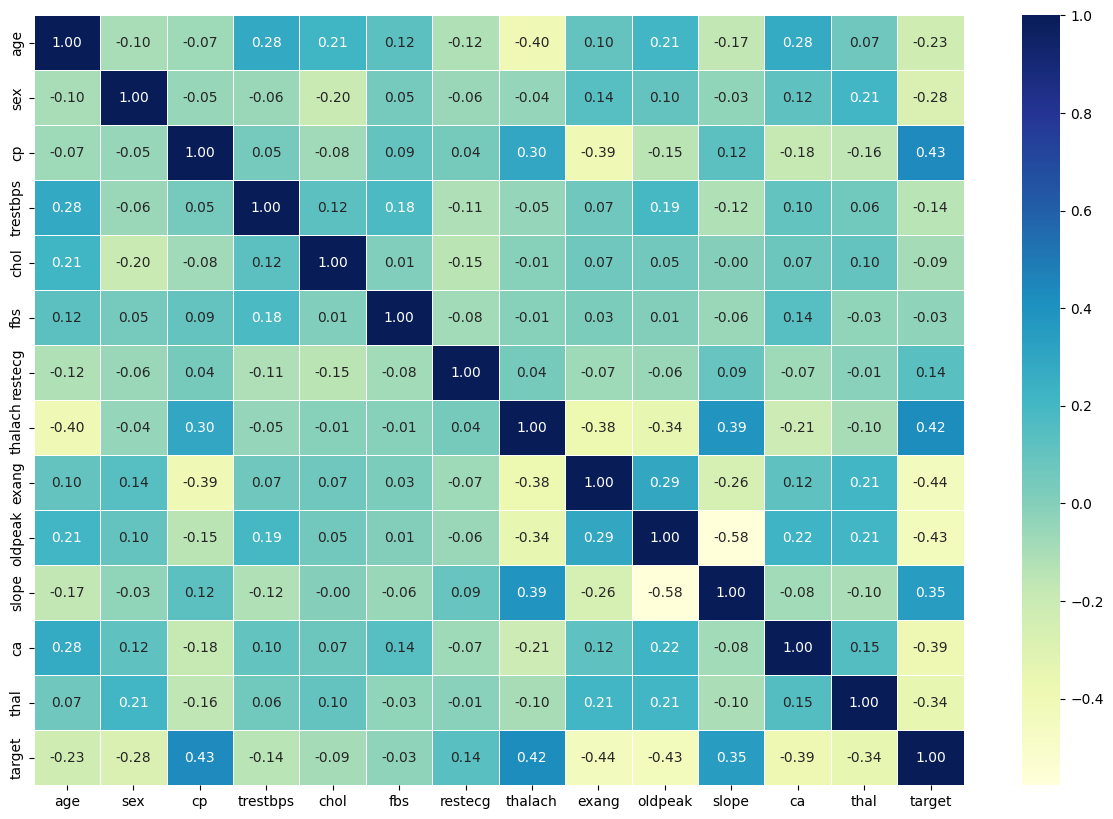

In [88]:
# Make correlation matrix prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

In [89]:
pd.crosstab(df["exang"], df["target"])

target,0,1
exang,,
0,62,142
1,76,23


Text(0, 0.5, 'Number of people')

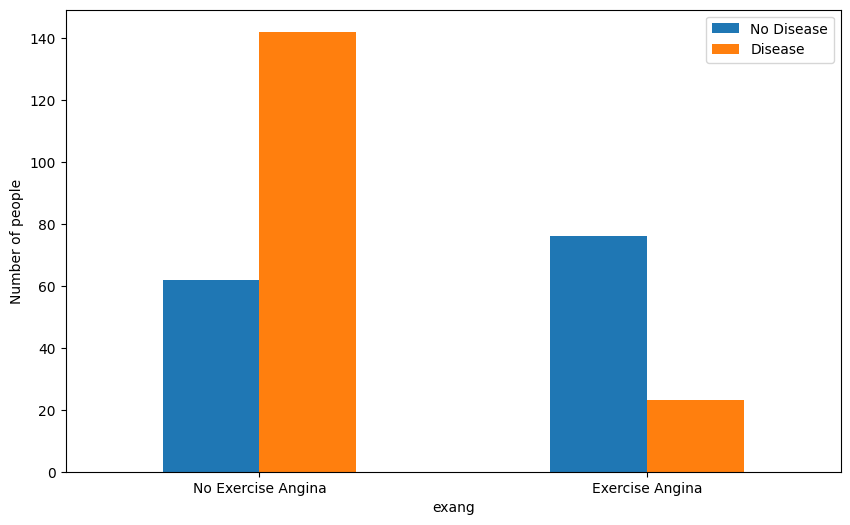

In [90]:
pd.crosstab(df["exang"], df["target"]).plot(kind="bar", figsize=(10, 6))
plt.legend(["No Disease", "Disease"])
plt.xticks(ticks=[0, 1], labels=["No Exercise Angina", "Exercise Angina"], rotation=0)
plt.ylabel("Number of people")

## Modelling

In [91]:
X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [92]:
# Three models to test
# 1. LogisticRegression
# 2. KNeighborsClassifier
# 3. RandomForestClassifier

In [93]:
models = {
        "LogisticRegression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "RandomForestClassifier": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [94]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

/home/kis619/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

In [96]:
model_compare_accuracy = pd.DataFrame(model_scores, index=["accuracy"])
model_compare_accuracy

,LogisticRegression,KNN,RandomForestClassifier
accuracy,0.885246,0.688525,0.836066


<Axes: >

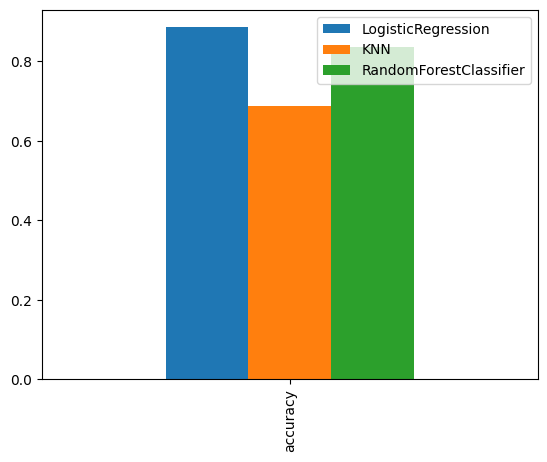

In [97]:
model_compare_accuracy.plot.bar()

<Axes: >

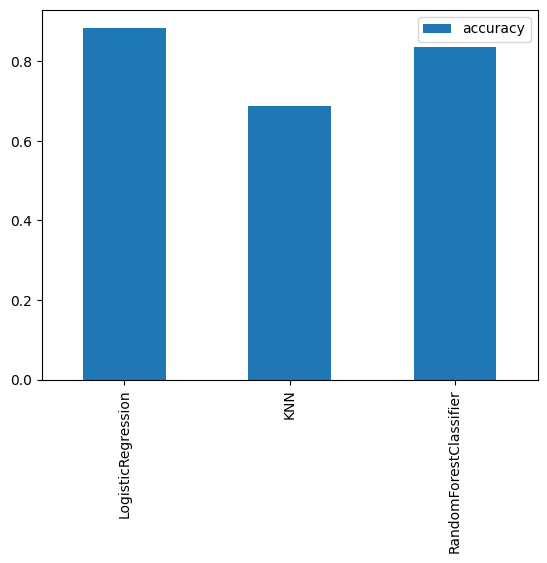

In [98]:
model_compare_accuracy.T.plot.bar()

## Tuning KNN

In [99]:
train_scores = []
test_scores = []

neighbors = range(1, 21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Max KNN score on the test data: 0.7540983606557377
Max KNN score on the test data: 75.41%
Optimal number of neighbors: 11


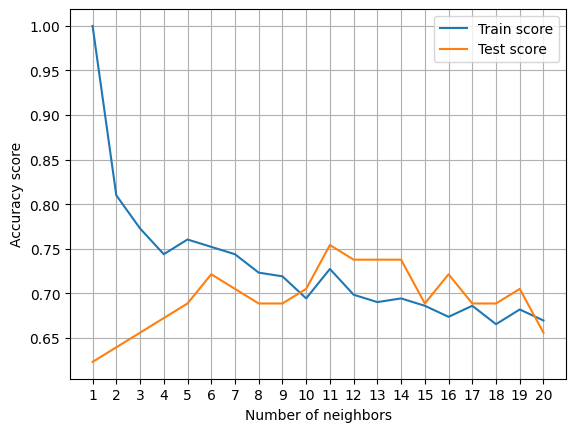

In [100]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy score")
plt.legend()
plt.grid()
print(f"Max KNN score on the test data: {max(test_scores)}")
print(f"Max KNN score on the test data: {max(test_scores) * 100:.2f}%")
print(f"Optimal number of neighbors: {test_scores.index(max(test_scores)) + 1}")

In [101]:
experimenting

['Hyperparameter tuning',
 'Feature importance',
 'Confusion matrix',
 'Cross-validation',
 'Precision',
 'Recall',
 'F1 score',
 'classification report',
 'ROC curve',
 'AUC (Area under the curve)']

## Tuning Logistic Regression and RandomForest

In [125]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

In [117]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

In [121]:
rs_log_reg.fit(X_train, y_train)
rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

In [122]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [126]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

In [127]:
rs_rf.fit(X_train, y_train)
rs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

In [128]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [129]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

## Tuning only Logistic Regression with GridSearchCV

In [140]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [141]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                  param_grid=log_reg_grid,
                  cv=5,
                  verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [142]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [143]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned ml classifier beyound accuracy

In [149]:
y_preds = gs_log_reg.predict(X_test)
y_preds, np.array(y_test)

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]))

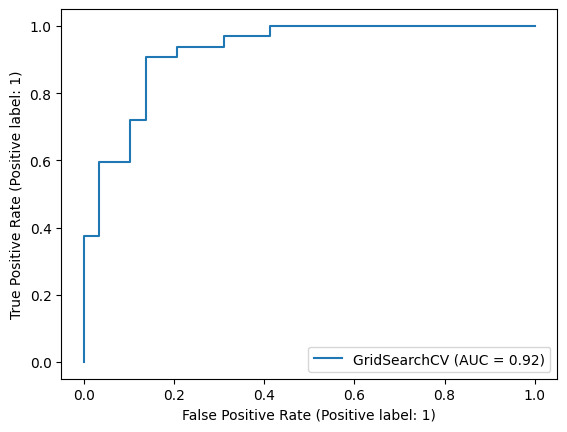

In [150]:
# PLot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [152]:
# Confusion metrics
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [156]:
pd.crosstab(y_test, y_preds, rownames=["Actual labels"], colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,25,4
1,3,29


<Axes: >

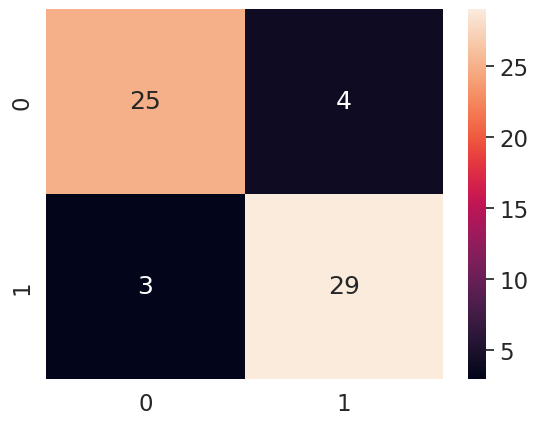

In [159]:
sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)

In [161]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [162]:
precision_score(y_test, y_preds)

0.8787878787878788

In [163]:
recall_score(y_test, y_preds)

0.90625

In [164]:
f1_score(y_test, y_preds)

0.8923076923076922

### Calculating evaluation metrics using cross-validation

In [165]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [170]:
# new clasifier with best params
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")

In [180]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [189]:
def eval(clf, data, target, cv=5, scoring=["accuracy"]):
    metrics_evaled = {}
    for metric in scoring:
#         print(metric)
        metrics_evaled[metric] = cross_val_score(clf,
                                                 data,
                                                 target,
                                                 cv=cv,
                                                 scoring=metric).mean()
    return metrics_evaled
    
    

In [191]:
scoring = ["accuracy", "precision", "recall", "f1"]
metrics = eval(clf, X, y, scoring=scoring)
print(metrics)

{'accuracy': 0.8479781420765027, 'precision': 0.8215873015873015, 'recall': 0.9272727272727274, 'f1': 0.8705403543192143}


In [197]:
df = pd.DataFrame(metrics, index=["mean_values"])
df

,accuracy,precision,recall,f1
mean_values,0.847978,0.821587,0.927273,0.87054


<Axes: >

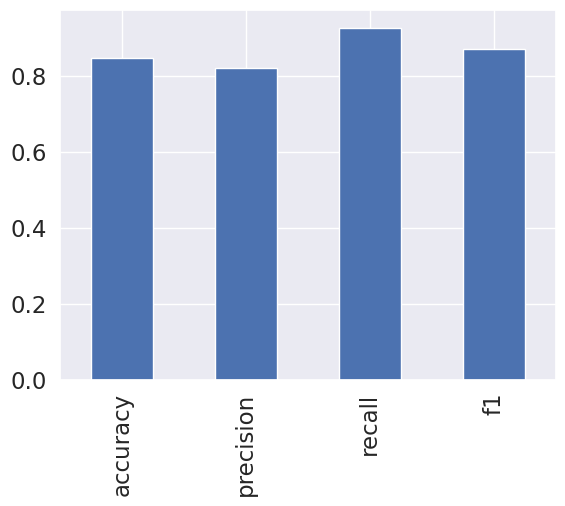

In [201]:
df.T.plot.bar(legend=False)

## Feature Importance

In [205]:
# new clasifier with best params
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [206]:
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [209]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [212]:
pd.DataFrame(X.columns, clf.coef_[0])

,0
0.003699,age
-0.904241,sex
0.674728,cp
-0.011613,trestbps
-0.001704,chol
0.047877,fbs
0.334902,restecg
0.024729,thalach
-0.631204,exang
-0.575910,oldpeak


In [215]:
feature_dict = dict(zip(X.columns, clf.coef_[0]))

In [216]:
feature_dict


{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

In [222]:
features_df = pd.DataFrame(feature_dict, index=["Coefficient"])

<Axes: title={'center': 'Feature importance'}>

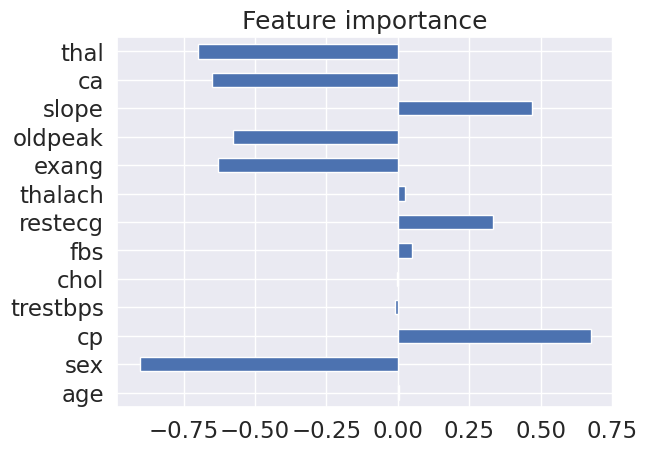

In [226]:
features_df.T.plot.barh(legend=False, title="Feature importance")